## Numerical Differentiation
**Nick Kern**
<br>
**Astro 9: Python Programming in Astronomy**
<br>
**UC Berkeley**

Reading: [Chp. 5, Computational Physics w/ Python](http://www-personal.umich.edu/~mejn/computational-physics/)

Having learned techniques for numerical integration, now its time to learn techniques for numerical differentiation. We wil cover multiple ways to take a derivative, study their error properties, and apply them to an example problem.

Recall the standard definition of a derivative as

\begin{align}
\frac{df}{dx} = \lim_{h\rightarrow0}\frac{f(x+h) - f(x)}{h},
\end{align}

where we can't physically make $h\rightarrow0$, but we can make it very small to get a good approximation. We will look at this and other definitions of the derivative and their practical implementations. We call these kinds of derivative approximation formulas **finite difference** formulas.

### Finite Differences

<img src='imgs/finite_diff.png' width=400px/>
<center>Forward and backward finite difference. IC: Newman, Fig. 5.9</center>

A **forward finite difference** is exactly the standard definition of the derivative. Assuming we are starting at the middle point in the above, figure, we calculate $f(x+h)$ and use the standard definition to get $f^{\prime}(x)$. The **backward finite difference**, as suggested by the figure, can then be written as

\begin{align}
\frac{df}{dx} = \lim_{h\rightarrow0}\frac{f(x)-f(x-h)}{h}
\end{align}

There is typically no reason to prefer one over the other, and mostly one would use a forward difference. One reason to prefer one over the other, however, might be if one is approaching a discontinuity in $f(x)$, or if $f(x)$ is bounded and we are one edge of it.

You might have noticed that the forward and backward derivative doesn't really look like a good approximation of the true derivative at $x$, in fact, it looks like a better approximation at $x+\frac{1}{2}h$, or halfway between the two points. We can, in fact, create a better finite difference method using this concept, which is called a **central finite difference**. As you may have guessed, it is written as

\begin{align}
\frac{df}{dx} &= \lim_{h\rightarrow0}\frac{f(x+h/2) - f(x-h/2)}{h}\\
&\text{or}\\
\frac{df}{dx} &= \lim_{h\rightarrow0}\frac{f(x+h) - f(x-h)}{2h}
\end{align}

Note that for a central difference of $f$ at $x$, we don't actually need to know the value of $f(x)$.


### Breakout 1

1.
Let's write our own forward, backward and central finite difference functions. This should be quick, because their are each two-liners and I've prepared starter code for you.

2.
Take the forward, backward and central derivatives of $f(x) = x^{3} - 4x^{2} + 2x$ at $x = 1$. Compare to the true answer derived by-hand. Which method is the most accurate? How does this accuracy depend on your selection of $h$?

In [4]:
def func(x):
    return x**3 - 4*x**2 + 2*x

In [1]:
def forward_diff(func, x, h=1e-4):

    return (func(x + h) - func(x)) / h
    
def backward_diff(func, x, h=1e-4):
    
    return (func(x) - func(x-h)) / h

def central_diff(func, x, h=1e-4):
    
    return (func(x+h/2) - func(x-h/2)) / h

In [2]:
true_ans = -3

In [11]:
# print out accuracy of each method, what happens when h gets too small?
h = 1e-12
print("forward diff yields error of {:.10f}".format(true_ans - forward_diff(func, 1, h)) )
print("backward diff yields error of {:.10f}".format(true_ans - backward_diff(func, 1, h )) )
print("central diff yields error of {:.10f}".format(true_ans - central_diff(func, 1, h )) )

forward diff yields error of 0.0002667017
backward diff yields error of 0.0000446571
central diff yields error of 0.0002667017


### Errors

As with our numerical integrals, a numerical derivative is not exact and is subject to numerical errors, particularly the **rounding error** and **subtraction error** we discussed before, but another is one that is more obvious from the figure above, which is **approximation error**. Let's discuss this in the context of a Taylor expansion. 

Recall that **any** function can be approximated at a given $x_{0}$ using a [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series), which has an infinite number of terms. Each term in the sum relies on a higher order derivative of $f(x)$, and pushes the accuracy of the expansion to larger values of $|x - x_{0}|$. In general, a taylor expansion is written as

\begin{align}
f(x) = f(x_{0}) + \frac{(x-x_{0})}{1!}f^{\prime}(x_{0}) + \frac{(x-x_{0})^{2}}{2!}f^{\prime\prime}(x_{0}) + \frac{(x-x_{0})^{3}}{3!}f^{\prime\prime\prime}(x_{0}) + \ldots,
\end{align}
where $f^{\prime}$ represents the first derivative, $f^{\prime\prime}$ the second derivative and so on.

In our context, we are seeking to use the derivative of $f$ at $x$ to recover the function value at $x+h$, meaning  we can express the Taylor expansion about $x$ as

\begin{align}
f(x+h) = f(x) + h\cdot f^{\prime}(x) + \frac{1}{2}h^{2}\cdot f^{\prime\prime}(x) + \ldots
\end{align}

**Forward and Backward Difference**

If we rearrange this expression for $f^{\prime}(x)$, we find

\begin{align}
f^{\prime}(x) = \frac{f(x+h) - f(x)}{h} - \frac{1}{2}h\cdot f^{\prime\prime}(x) + \ldots,
\end{align}

which looks exactly like our forward difference formula plus a leading order error term the scales as $\mathcal{O}(h)$. This means that, to leading order, the error on a forward / backward difference scales as $h$ and has an approximate magnitude of $\frac{1}{2}h\left|f^{\prime\prime}\right|$.

**Central Difference**

What about for a central difference? Here, we need to write two Taylor expansions:

\begin{align}
f(x+h) &= f(x) + h\cdot f^{\prime}(x) + \frac{1}{2}h^{2}\cdot f^{\prime\prime}(x) + \frac{1}{9}h^{3}\cdot f^{\prime\prime\prime}(x) + \ldots \\
\\
f(x-h) &= f(x) - h\cdot f^{\prime}(x) + \frac{1}{2}h^{2}\cdot f^{\prime\prime}(x) - \frac{1}{9}h^{3}\cdot f^{\prime\prime\prime}(x) + \ldots
\end{align}

and if we subtract the second from the first, we are left with

\begin{align}
f^{\prime}(x) = \frac{f(x+h) - f(x-h)}{2h} - \frac{1}{9}h^{2}f^{\prime\prime\prime}(x) + \ldots
\end{align}

The first term is exactly our central difference formula, meaning the central difference has an error that goes as $\mathcal{O}(h^{2})$ to leading order. This confirms our intuition from before, showing that the error on a central difference scales as $h^{2}$ rather than just $h$ of the forward difference.

**Ideal Step Size $h$**

We can't make $h$ arbitrarily small; however, we saw before that a too-small $h$ actually makes the error diverge due to subtraction error. So, what's the best value of $h$? What's the sweet spot that minimizes both the subtraction error and the approximation error? You can find a quantitative argument in Newman 5.9.2, which says that

\begin{align}
h_{\text{ideal}} = \sqrt{4C\left|\frac{f(x)}{f^{\prime\prime}(x)}\right|}
\end{align}

for a forward or backward difference, where $C$ is the machine floating-point precision of $10^{-16}$. If $f(x) \sim f^{\prime\prime}(x) \sim 1$, then $\boxed{h_{\text{ideal}} = 10^{-8}}$ for a forward or backward difference. For a central difference, we get

\begin{align}
h_{\text{ideal}} = \left(24C\left|\frac{f(x)}{f^{\prime\prime\prime}(x)}\right|\right)^{1/3},
\end{align}
meaning, assuming $f(x) \sim f^{\prime\prime\prime}(x) \sim 1$, then $\boxed{h_{\text{ideal}} = 10^{-5}}$ for a central difference.

### Breakout 2

Let's confirm graphically the optimal step size, $h$, for a forward and central difference.

1.
Differentiate the same function as before, $f(x) = x^{3} - 4x^{2} + 2x$ at $x=1$ with a range of $h$ values, from $10^{-12} < h < 10^{-2}$, and store the true answer minus the numerical approximation into an array called `epsilon`, which we will take to be the error, $\epsilon$. Do this for all three derivative methods. Foreshadowing: we will want to plot our results in log-log space. In order to draw samples of $h$ evenly in log-space, you can use the `numpy.logspace()` function instead of the `linspace()` function.

2.
Make a plot of $\epsilon$ on the y-axis and $h$ on the x-axis in log-log space. What is the optimal step-size for taking a derivative of this function at $x=1$ for each of the three methods? What is the smallest error you can achieve?


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from NumDiff_Breakout1 import *

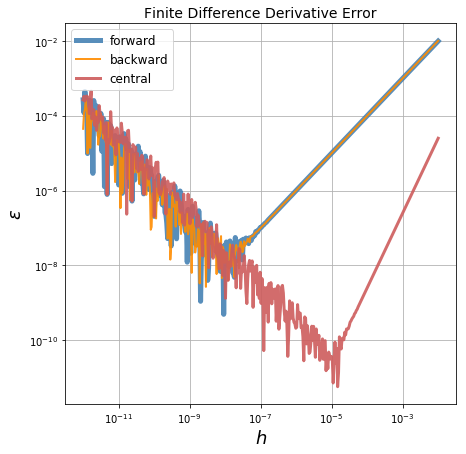

In [4]:
## Calculate Error
H = np.logspace(-2, -12, 400)

for_err = []
bac_err = []
cen_err = []
for h in H:
        for_err.append( np.abs(-3 - forward_diff(func, 1.0, h=h) ) )
        bac_err.append( np.abs(-3 - backward_diff(func, 1.0, h=h) ) )
        cen_err.append( np.abs(-3 - central_diff(func, 1.0, h=h) ) )


## Plot

# Figure
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)

# Errors
p1 = ax.plot(H, for_err, color='steelblue', linewidth=5, alpha=0.9)
p2 = ax.plot(H, bac_err, color='darkorange', linewidth=2, alpha=0.9)
p3 = ax.plot(H, cen_err, color='indianred', linewidth=3, alpha=0.9)

# labels
ax.set_xlabel(r'$h$', fontsize=18)
ax.set_ylabel(r'$\epsilon$', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(r'Finite Difference Derivative Error', fontsize=14)
ax.legend([p1[0], p2[0], p3[0]], ['forward', 'backward', 'central'], fontsize=12)

### Second Derivatives

The second derivative is the derivative of the first derivative. We can find this numerically by applying the finite difference formulat twice in a row. Using the central difference formula, we find

\begin{align}
f^{\prime\prime}(x) &\simeq \frac{f^{\prime}(x+h/2) - f^{\prime}(x-h/2)}{h}\\
\\
&= \frac{\left[f(x+h) - f(x)\right]/h - \left[f(x)-f(x-h)\right]/h}{h}\\
\\
&= \frac{f(x+h) - 2f(x) + f(x-h)}{h^{2}}.
\end{align}

Note that while we only need two points to calculate a first derivative, we now need three points to calculate a second derivative.

Going through similar error arguments as before, we can find that the error of a central difference second derivative scales as $\mathcal{O}(h^{2})$, similar to its first derivative counterpart.

### Breakout 3

1.
Write a function for a central-difference second derivative (again a two-liner). Use it to calculate the second derivative of $f(x) = x^{3} - 4x^{2} + 2x$ at $x=1$ and compare to your expectation from analytics.

2.
Write a new central difference second derivative function that can be used on sampled data, rather than a continuous function. Look at the data in `freefall.txt`, which contains position and time information for an object in free fall near the Earth's surface. Give $N$ evenly-spaced time samples in `freefall.txt`, how many samples of the second-derivative will you have using the central-difference method? Use your new second derivative function to calculate the Earth's gravitational acceleration in $\text{meters}\ \text{sec}^{-2}$.

In [5]:
from NumDiff_Breakout1 import func

In [6]:
def central_second_deriv(func, x, h=1e-5):
        return (func(x+h) - 2*func(x) + func(x-h)) / h**2

In [7]:
def central_second_deriv_sampled(fxph, fx, fxmh, h):
        """
        fxph : f(x plus h)
        fx : f(x)
        fxmh : f(x minus h)
        """
        return (fxph - 2*fx + fxmh)/h**2

In [10]:
d = np.loadtxt('data/freefall.txt', delimiter=',')

In [12]:
# Derivative
h = 1e-5
print("central-difference second derivative with h = {} has error = {}".format(h, -2-central_second_deriv(func, 1, h=h)))

# load freefall data
time, pos = np.loadtxt('data/freefall.txt', delimiter=',', unpack=True)
dt = time[1] - time[0]

# Get second derivative at three points
sec_deriv = []
for i in range(len(pos))[1:-1]:
        sec_deriv.append(central_second_deriv_sampled(pos[i-1], pos[i], pos[i+1], dt))

print("The gravitational acceleration near the Earth's surface is roughly {:.5f} m/sec^2".format(np.mean(sec_deriv)))

central-difference second derivative with h = 1e-05 has error = 2.3859267908044046e-06
The gravitational acceleration near the Earth's surface is roughly 9.80700 m/sec^2


### Partial Derivatives

Partial derivatives are derivatives of functions with more than one independent variable (multivariate) with respect to only one of those variables. First and second partial derivatives are the same as their univariate derivative counterparts, with the implication that one holds all other independent variables constant while doing the finite difference. For example, the central difference for the first partial derivative with respect to both $x$ and $y$ can be written as

\begin{align}
\frac{\partial f}{\partial x} &= \frac{f(x+h/2, y) - f(x-h/2, y)}{h}\\
\\
\frac{\partial f}{\partial y} &= \frac{f(x, y+h/2) - f(x, y-h/2)}{h}
\end{align}

The second partial derivative with respect to only $x$ and only $y$ can be found similarly as before and yields the same equation. The second partial derivative with respect to both $x$ and $y$ can be found using the same second-derivative method as before, but the answer is quantitatively different, and can be written as

\begin{align}
\frac{\partial^{2}f}{\partial x\partial y} = \frac{f(x+h/2, y+h/2) - f(x-h/2, y+h/2) - f(x+h/2, y-h/2) + f(x-h/2, y-h/2)}{h^{2}}.
\end{align}

### Breakout 4: Calculate Force Given Potential

The negative spatial gradient of the potential yields the force vector:

\begin{align}
\vec{F}(x, y) = -\nabla U(x, y) = -\left<\frac{\partial U}{\partial x}, \frac{\partial U}{\partial y}\right>,
\end{align}

where $\frac{\partial}{\partial x}$ represents a partial derivative.

1.
Given the Rosenbrock function below, calculate the force vector on a 2D grid of points from $-1 < x < 1$ and $-1 < y < 1$.

2.
Make a **density plot of the magnitude** of the force vector using `imshow()`, and on the same plot, make a **plot the vector field** with the [`quiver()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.quiver.html) function in `matplotlib`.

Recall you can create a 2D grid of $X$ and $Y$ points like
```
X, Y = np.meshgrid(x_array, y_array)
```
where `x_array` and `y_array` the the steps in $x$ and $y$ (using something like `linspace` or `arange`).

In [18]:
def rosenbrock(x, y, a=1, b=100):
    return (a-x)**2 +b*(y - x**2)**2

In [19]:
def partial_x(func, x, y, h=1e-5):
        return (func(x+h/2, y) - func(x-h/2, y))/h

def partial_y(func, x, y, h=1e-5):
    return (func(x, y+h/2) - func(x, y-h/2))/h


In [20]:
# Setup meshgrid
x = np.linspace(-1, 1, 26)
y = np.linspace(-1, 1, 26)
X, Y = np.meshgrid(x, y)

In [21]:
# iterate through grid cells and calculate derivative
px = partial_x(rosenbrock, X, Y, h=1e-5)
py = partial_y(rosenbrock, X, Y, h=1e-5)
pmag = np.sqrt(px**2 + py**2)

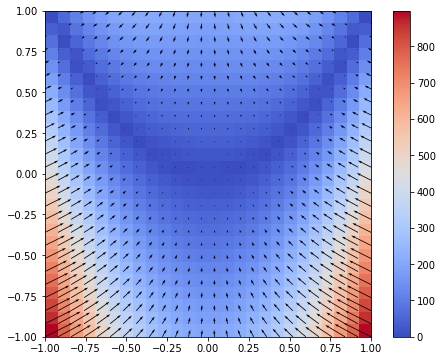

In [28]:
# Plot density plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)
cax = ax.imshow(pmag, extent=(-1, 1, -1, 1), cmap='coolwarm', origin='lower')
fig.colorbar(cax)
ax.quiver(X, Y, -px, -py)
